<a href="https://colab.research.google.com/github/ds-raw/darkknight/blob/master/Train_test_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('sample_data/train-test.csv')

In [3]:
df

,Y,X,Kota,Provinsi,Luas,Tahun,pulau,Permukiman,Urban,kelas,jalan_utama,jarak_prov,jarak_kota,jarak_kab,Periode,Sewa_sqm,reg
0,4.131920,117.658010,NUNUKAN,KALIMANTAN UTARA,160.0,2008,0,1,0,2,50.147720,518568.640023,91557.829625,9064.506133,15.005479,173611.106250,0
1,-0.558250,117.078560,KOTA SAMARINDA,KALIMANTAN TIMUR,315.0,2017,0,1,1,1,872.106810,9262.728046,10743.996898,19031.155385,10.002740,134038.800000,0
2,-0.577210,117.192650,KOTA SAMARINDA,KALIMANTAN TIMUR,400.0,2007,0,1,1,1,6510.587180,10416.311047,11079.379141,29180.220327,15.008219,13888.887500,0
3,-0.525720,117.148450,KOTA SAMARINDA,KALIMANTAN TIMUR,210.0,2007,0,1,1,2,35.227804,2968.142747,4051.449254,21775.241907,15.008219,33333.333333,0
4,-0.507920,117.170490,KOTA SAMARINDA,KALIMANTAN TIMUR,550.0,2021,0,0,1,0,1528.090873,3650.277087,3438.995880,22841.243966,5.000000,757575.758182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,-5.380850,105.099400,PESAWARAN,LAMPUNG,80.0,2021,0,1,0,1,82.836467,18691.236497,18734.779762,5236.445105,10.000000,354444.437500,1
1331,-3.002936,106.454697,BANGKA SELATAN,KEPULAUAN BANGKA BELITUNG,100.0,2021,1,1,0,0,870.632534,104256.691573,189508.111597,36220.581667,5.000000,256000.000000,1
1332,-4.903210,105.213550,LAMPUNG TENGAH,LAMPUNG,100.0,2021,0,1,0,1,192.520229,59710.147545,25526.418261,7826.530318,5.000000,273333.330000,1
1333,0.451440,101.383690,KOTA PEKANBARU,RIAU,64.0,2021,0,1,1,2,36.622667,10318.518422,10062.309703,42619.262028,10.000000,347569.437500,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Y            1335 non-null   float64
 1   X            1335 non-null   float64
 2   Kota         1335 non-null   object 
 3   Provinsi     1335 non-null   object 
 4   Luas         1335 non-null   float64
 5   Tahun        1335 non-null   int64  
 6   pulau        1335 non-null   int64  
 7   Permukiman   1335 non-null   int64  
 8   Urban        1335 non-null   int64  
 9   kelas        1335 non-null   int64  
 10  jalan_utama  1335 non-null   float64
 11  jarak_prov   1335 non-null   float64
 12  jarak_kota   1335 non-null   float64
 13  jarak_kab    1335 non-null   float64
 14  Periode      1335 non-null   float64
 15  Sewa_sqm     1335 non-null   float64
 16  reg          1335 non-null   int64  
dtypes: float64(9), int64(6), object(2)
memory usage: 177.4+ KB


In [25]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Y,1333.000,-0.121,3.190,-6.056,-2.894,-0.258,2.530,5.898
X,1333.000,106.559,8.580,95.269,99.269,104.014,115.267,125.591
Luas,1333.000,301.494,484.636,1.000,120.000,300.000,330.000,10000.000
Tahun,1333.000,2012.137,7.135,1900.000,2006.000,2010.000,2020.000,2022.000
pulau,1333.000,0.040,0.195,0.000,0.000,0.000,0.000,1.000
Permukiman,1333.000,0.591,0.492,0.000,0.000,1.000,1.000,1.000
Urban,1333.000,0.311,0.463,0.000,0.000,0.000,1.000,1.000
kelas,1333.000,1.436,1.250,0.000,1.000,1.000,2.000,4.000
jalan_utama,1333.000,2135.969,8412.940,0.016,47.456,137.096,705.451,196294.722
jarak_prov,1333.000,90317.386,81342.301,308.210,15217.302,79815.005,137887.831,525237.933


In [6]:
df.isnull().sum()

Y              0
X              0
Kota           0
Provinsi       0
Luas           0
Tahun          0
pulau          0
Permukiman     0
Urban          0
kelas          0
jalan_utama    0
jarak_prov     0
jarak_kota     0
jarak_kab      0
Periode        0
Sewa_sqm       0
reg            0
dtype: int64

In [7]:
duplicate_rows = df.duplicated()
duplicate_rows.sum()

1

In [8]:
df[df.duplicated()]

,Y,X,Kota,Provinsi,Luas,Tahun,pulau,Permukiman,Urban,kelas,jalan_utama,jarak_prov,jarak_kota,jarak_kab,Periode,Sewa_sqm,reg
226,-2.492978,112.961735,Kotawaringin Timur,Kalimantan Tengah,220.0,2011,0,0,1,0,897.662398,110830.854347,108038.831652,5442.6842,10.0,68181.818182,0


In [15]:
df = df.drop_duplicates(keep=False)
duplicate_rows = df.duplicated()
duplicate_rows.sum()

0

In [32]:
q25, q75 = np.quantile(df['Luas'], 0.25), np.quantile(df['Luas'], 0.75)
    # calculate the IQR
iqr = q75 - q25
    # calculate the outlier cutoff
cut_off = iqr * 1.5
    # calculate the lower and upper bound value
lower, upper = q25 - cut_off, q75 + cut_off
print('The IQR is',iqr)
print('The lower bound value is', lower)
print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
df1 = df[df['Luas'] > upper]
df2 = df[df['Luas'] < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

The IQR is 210.0
The lower bound value is -195.0
The upper bound value is 645.0
Total number of outliers are 52


In [40]:
df_no_outlier = df[(df["Luas"] >= lower) & (df["Luas"] <= upper)]

In [42]:
df_no_outlier

,Y,X,Kota,Provinsi,Luas,Tahun,pulau,Permukiman,Urban,kelas,jalan_utama,jarak_prov,jarak_kota,jarak_kab,Periode,Sewa_sqm,reg
0,4.132,117.658,NUNUKAN,KALIMANTAN UTARA,160.000,2008,0,1,0,2,50.148,518568.640,91557.830,9064.506,15.005,173611.106,0
1,-0.558,117.079,KOTA SAMARINDA,KALIMANTAN TIMUR,315.000,2017,0,1,1,1,872.107,9262.728,10743.997,19031.155,10.003,134038.800,0
2,-0.577,117.193,KOTA SAMARINDA,KALIMANTAN TIMUR,400.000,2007,0,1,1,1,6510.587,10416.311,11079.379,29180.220,15.008,13888.888,0
3,-0.526,117.148,KOTA SAMARINDA,KALIMANTAN TIMUR,210.000,2007,0,1,1,2,35.228,2968.143,4051.449,21775.242,15.008,33333.333,0
4,-0.508,117.170,KOTA SAMARINDA,KALIMANTAN TIMUR,550.000,2021,0,0,1,0,1528.091,3650.277,3438.996,22841.244,5.000,757575.758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,-5.381,105.099,PESAWARAN,LAMPUNG,80.000,2021,0,1,0,1,82.836,18691.236,18734.780,5236.445,10.000,354444.438,1
1331,-3.003,106.455,BANGKA SELATAN,KEPULAUAN BANGKA BELITUNG,100.000,2021,1,1,0,0,870.633,104256.692,189508.112,36220.582,5.000,256000.000,1
1332,-4.903,105.214,LAMPUNG TENGAH,LAMPUNG,100.000,2021,0,1,0,1,192.520,59710.148,25526.418,7826.530,5.000,273333.330,1
1333,0.451,101.384,KOTA PEKANBARU,RIAU,64.000,2021,0,1,1,2,36.623,10318.518,10062.310,42619.262,10.000,347569.438,1


,Y,X,Kota,Provinsi,Luas,Tahun,pulau,Permukiman,Urban,kelas,jalan_utama,jarak_prov,jarak_kota,jarak_kab,Periode,Sewa_sqm,reg
0,4.132,117.658,NUNUKAN,KALIMANTAN UTARA,160.000,2008,0,1,0,2,50.148,518568.640,91557.830,9064.506,15.005,173611.106,0
1,-0.558,117.079,KOTA SAMARINDA,KALIMANTAN TIMUR,315.000,2017,0,1,1,1,872.107,9262.728,10743.997,19031.155,10.003,134038.800,0
2,-0.577,117.193,KOTA SAMARINDA,KALIMANTAN TIMUR,400.000,2007,0,1,1,1,6510.587,10416.311,11079.379,29180.220,15.008,13888.888,0
3,-0.526,117.148,KOTA SAMARINDA,KALIMANTAN TIMUR,210.000,2007,0,1,1,2,35.228,2968.143,4051.449,21775.242,15.008,33333.333,0
4,-0.508,117.170,KOTA SAMARINDA,KALIMANTAN TIMUR,550.000,2021,0,0,1,0,1528.091,3650.277,3438.996,22841.244,5.000,757575.758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,-5.381,105.099,PESAWARAN,LAMPUNG,80.000,2021,0,1,0,1,82.836,18691.236,18734.780,5236.445,10.000,354444.438,1
1331,-3.003,106.455,BANGKA SELATAN,KEPULAUAN BANGKA BELITUNG,100.000,2021,1,1,0,0,870.633,104256.692,189508.112,36220.582,5.000,256000.000,1
1332,-4.903,105.214,LAMPUNG TENGAH,LAMPUNG,100.000,2021,0,1,0,1,192.520,59710.148,25526.418,7826.530,5.000,273333.330,1
1333,0.451,101.384,KOTA PEKANBARU,RIAU,64.000,2021,0,1,1,2,36.623,10318.518,10062.310,42619.262,10.000,347569.438,1


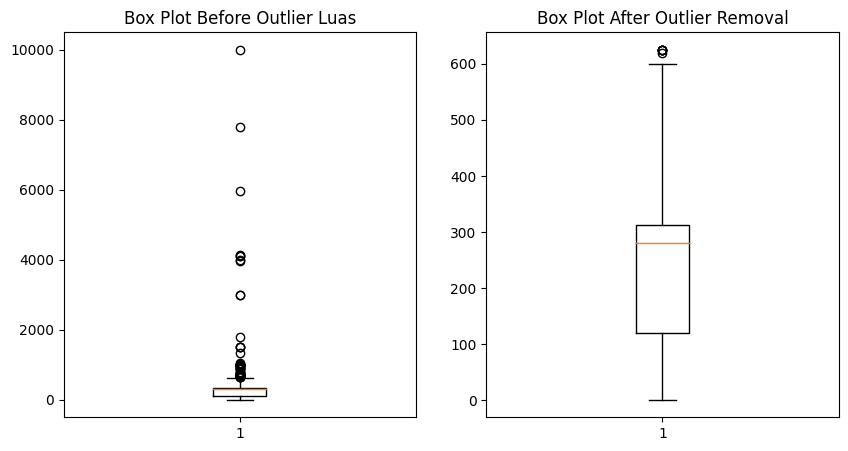

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].boxplot(df['Luas'])
axes[0].set_title('Box Plot Before Outlier Luas')

axes[1].boxplot(df_no_outlier['Luas'])
axes[1].set_title('Box Plot After Outlier Removal')

plt.show()

In [44]:
print(len(df),len(df_no_outlier))

1333 1281
